In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
!pip install -U dmba;
from dmba import regressionSummary
from sklearn.preprocessing import OrdinalEncoder

from google.colab import drive
drive.mount('/content/drive')

# Load Dataset 1
file_path_1 = '/content/drive/MyDrive/476 project/datasets/flight_data_0-1.csv'
df_01 = pd.read_csv(file_path_1)

# Load Dataset 2
file_path_2 = '/content/drive/MyDrive/476 project/datasets/flight_data_15+.csv'
df_15 = pd.read_csv(file_path_2)

# Define categorical columns
categorical_cols = ['AIRLINE', 'ORIGIN', 'DEST']

# Dataset 1
X_01 = df_01.drop(columns=['ARR_DELAY'])  # Features
y_01 = df_01['ARR_DELAY']                # Target

# Dataset 2
X_15 = df_15.drop(columns=['ARR_DELAY'])  # Features
y_15 = df_15['ARR_DELAY']                 # Target

# Apply Ordinal Encoding to both datasets
encoder = OrdinalEncoder()
X_01[categorical_cols] = encoder.fit_transform(X_01[categorical_cols])
X_15[categorical_cols] = encoder.fit_transform(X_15[categorical_cols])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Recode airlines as 0/1 to work with neural net

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on the 'AIRLINE' column
airline_encoded_01 = encoder.fit_transform(X_01[['AIRLINE']])
airline_encoded_15 = encoder.transform(X_15[['AIRLINE']])  # Use the same encoder for both datasets

# Get feature names for the encoded columns
airline_feature_names = encoder.get_feature_names_out(['AIRLINE'])

# Create DataFrames for the encoded features
airline_encoded_df_01 = pd.DataFrame(airline_encoded_01, columns=airline_feature_names, index=X_01.index)
airline_encoded_df_15 = pd.DataFrame(airline_encoded_15, columns=airline_feature_names, index=X_15.index)

# Concatenate the encoded features with the original DataFrames
X_01 = pd.concat([X_01, airline_encoded_df_01], axis=1)
X_15 = pd.concat([X_15, airline_encoded_df_15], axis=1)

# Now, drop the original 'AIRLINE' column
X_01 = X_01.drop(columns=['AIRLINE'])
X_15 = X_15.drop(columns=['AIRLINE'])

In [ ]:
# Drop the categorical variables (airline origin and dest) and split the data and scale it. be sure to apply the training population mean and std dev to the testing

# Drop categorical variables
X_01 = X_01.drop(columns=['ORIGIN', 'DEST'])
X_15 = X_15.drop(columns=['ORIGIN', 'DEST'])

# Split data into training and testing sets for both datasets
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01, y_01, test_size=0.2, random_state=42)
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

# Scale data using StandardScaler for both datasets
scaler = StandardScaler()
X_train_01_scaled = scaler.fit_transform(X_train_01)
X_test_01_scaled = scaler.transform(X_test_01)  # Apply the same scaler to the test set

X_train_15_scaled = scaler.fit_transform(X_train_15)
X_test_15_scaled = scaler.transform(X_test_15)  # Apply the same scaler to the test set

In [ ]:
# Create a neural network for both datasets using MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=42, max_iter=500). output MSEs for both datasets 01 and 15, and the accuracy % at the optimal cutoff for dataset 01

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Create and train the MLPRegressor for dataset 01
mlp_regressor_01 = MLPRegressor(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=42, max_iter=500)
mlp_regressor_01.fit(X_train_01_scaled, y_train_01)

# Make predictions on the test set for dataset 01
y_pred_01 = mlp_regressor_01.predict(X_test_01_scaled)

# Calculate MSE for dataset 01
mse_01 = mean_squared_error(y_test_01, y_pred_01)
print("MSE for Dataset 01:", mse_01)


# Create and train the MLPRegressor for dataset 15
mlp_regressor_15 = MLPRegressor(hidden_layer_sizes=(3), activation='relu', solver='lbfgs', random_state=42, max_iter=500)
mlp_regressor_15.fit(X_train_15_scaled, y_train_15)

# Make predictions on the test set for dataset 15
y_pred_15 = mlp_regressor_15.predict(X_test_15_scaled)

# Calculate MSE for dataset 15
mse_15 = mean_squared_error(y_test_15, y_pred_15)
print("MSE for Dataset 15:", mse_15)









MSE for Dataset 01: 0.13653475954766703
MSE for Dataset 15: 1312.9889570836954
Accuracy for Dataset 01 at the cutoff: 99.45742880227408
Optimal Cutoff Value for Dataset 01: 1


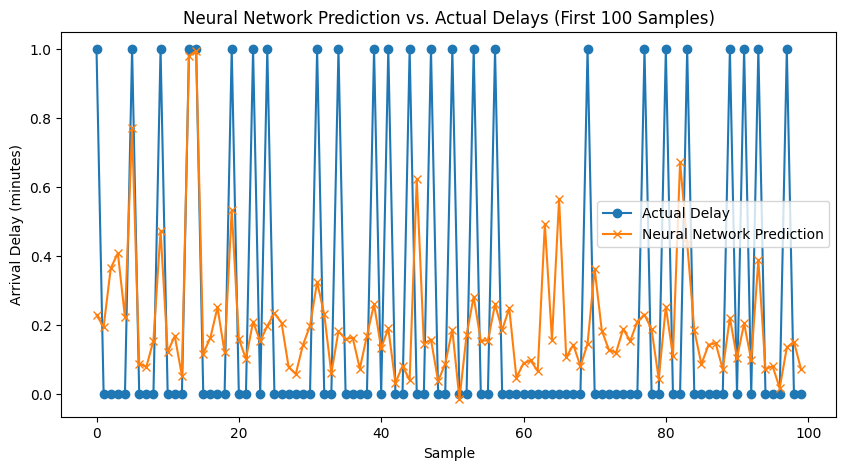

MSE in minutes for dataset 01: 0.13653475954766703


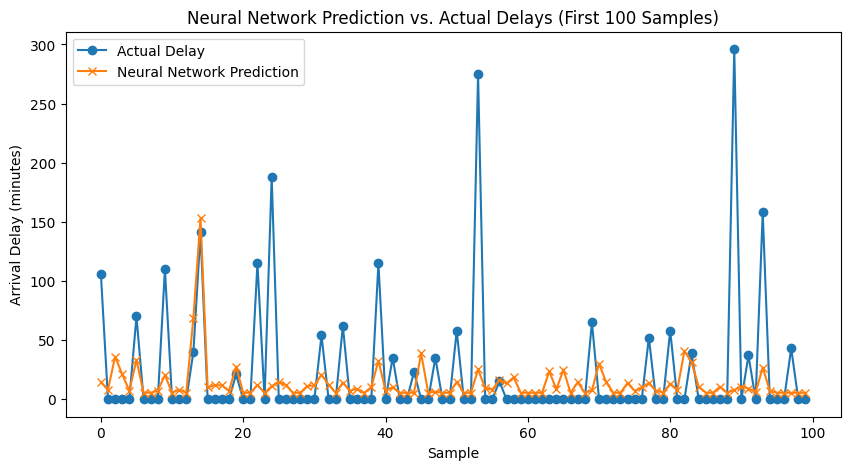

MSE in minutes for dataset 15: 1312.9889570836954


In [ ]:
# Show MSE in minutes from the neural net and plot results

plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test_01[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_01[:100], label="Neural Network Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()
plt.show()

mse_01_minutes = mse_01
print("MSE in minutes for dataset 01:", mse_01_minutes)

plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test_15[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_15[:100], label="Neural Network Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()
plt.show()

mse_15_minutes = mse_15
print("MSE in minutes for dataset 15:", mse_15_minutes)

In [ ]:
# In the 15+ dataset classify predictions of 15 and above as 1 and below 15 as 0. then give the mse for the new zero to one prediction. also show a table of some predictions next to their actual 0/1 value

# Classify predictions of 15 and above as 1 and below 15 as 0 for dataset 15
y_pred_binary_15 = [1 if pred >= 15 else 0 for pred in y_pred_15]
y_test_binary_15 = [1 if actual >= 15 else 0 for actual in y_test_15]

# Calculate MSE for the new 0/1 prediction for dataset 15
mse_15_binary = mean_squared_error(y_test_binary_15, y_pred_binary_15)
print("MSE for Dataset 15 (Binary 0/1):", mse_15_binary)

# Create a table of some predictions next to their actual 0/1 value
comparison_df = pd.DataFrame({
    'Actual (0/1)': y_test_binary_15[:20],
    'Prediction (0/1)': y_pred_binary_15[:20]
})
print("\nComparison of Predictions and Actual Values (First 20 Samples):")
comparison_df

MSE for Dataset 15 (Binary 0/1): 0.25484333256665664

Comparison of Predictions and Actual Values (First 20 Samples):


,Actual (0/1),Prediction (0/1)
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1
